Identify data and document sources for the following variables at the most detailed geography:

- school capacity
- race by age by unit (unit is block, block group, tract)
- actual school catchment (boundaries)

# School capactiy (enrollment)

the CCD provides [data for the 2018-2019 school year](https://nces.ed.gov/ccd/files.asp#Fiscal:2,LevelId:7,SchoolYearId:33,Page:1) containing the count of students in a school broken down by **grade, race, and sex** for 2018-2019 ([direct download link](https://nces.ed.gov/ccd/data/zip/ccd_sch_052_1819_l_1a_091019.zip)). These counts can be summed to get the total enrollment in a school. The schools are identified by their name, their LEAID and their NCESSCHID, which can all be used to match to other datasets. 

**Extract the downloaded csv to `data` and rename to `ccd_enrollment_1819`**

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

In [3]:
df = pd.read_csv("data/ccd_enrollment_1819.csv")
# over 2GB, this file is gitignored out of the repository.

In [4]:
df.columns

Index(['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'SCH_NAME',
       'STATE_AGENCY_NO', 'UNION', 'ST_LEAID', 'LEAID', 'ST_SCHID', 'NCESSCH',
       'SCHID', 'GRADE', 'RACE_ETHNICITY', 'SEX', 'STUDENT_COUNT',
       'TOTAL_INDICATOR', 'DMS_FLAG'],
      dtype='object')

In [5]:
df.shape
# almost 12 million 

(11948167, 18)

In [6]:
df.head(25)

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,GRADE,RACE_ETHNICITY,SEX,STUDENT_COUNT,TOTAL_INDICATOR,DMS_FLAG
0,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,American Indian or Alaska Native,Female,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
1,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,American Indian or Alaska Native,Male,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
2,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Asian,Female,1.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
3,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Asian,Male,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
4,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Black or African American,Female,9.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
5,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Black or African American,Male,7.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
6,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Hispanic/Latino,Female,101.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
7,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Hispanic/Latino,Male,103.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
8,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Native Hawaiian or Other Pacific Islander,Female,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
9,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Native Hawaiian or Other Pacific Islander,Male,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported


In [7]:
df['TOTAL_INDICATOR'].unique()
# not sure if this matters

array(['Category Set A - By Race/Ethnicity; Sex; Grade',
       'Derived - Education Unit Total minus Adult Education Count',
       'Derived - Subtotal by Race/Ethnicity and Sex minus Adult Education Count',
       'Education Unit Total', 'Subtotal 4 - By Grade'], dtype=object)

We want to squish all the categories of students down so that we have one row per school indicating total enrollment.

### Alternate source: Urban Institute

The enrollment data can also be obtained through the Urban Institute API, assuming we have geographic data of the schools indexed by the school's `LEAID`

This may prove more or less convinient/reliable. Urban has presumably processed data from the CCD, which could cause problems for merging. On the other hand it might be more convinient to pull/organize the data programatically through the API.

In [9]:
from json import loads
from urllib.request import urlopen

In [10]:
url = "https://educationdata.urban.org/api/v1/school-districts/ccd/enrollment/2018/grade-8/"

In [13]:
response = urlopen(url)
data = loads(response.read())
data = pd.DataFrame.from_dict(data)
dfdict = dict(data['results'])
data = pd.DataFrame.from_dict(dfdict, orient='index')
# clean this up later

In [14]:
data.head()

,year,leaid,fips,grade,race,sex,enrollment
0,2018,0100002,1,8,99,99,NaN
1,2018,0100005,1,8,99,99,403.0
2,2018,0100006,1,8,99,99,463.0
3,2018,0100007,1,8,99,99,1076.0
4,2018,0100008,1,8,99,99,900.0


From here, we would just need to match the `LEAID` to the catchment geographies. 

# Catchment (attendance boundaries)

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
!mkdir "data/nces_att_bound"
!mkdir "data/edge_geocode"

A subdirectory or file data/nces_att_bound already exists.


Come courtesy of the [School Attendance Boundary Survey (SABS)](https://nces.ed.gov/programs/edge/SABS). In addition to the most recent version of the SABS being older than the rest of our data (2015-2016) school year, I get the impression that this data is too resource instensive for some local jurisdictions to gather, which may account for some missing polygons. 

In [16]:
attbound = gpd.read_file("data/nces_att_bound/SABS_1516/SABS_1516.shp")

In [17]:
attbound.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry
0,None,010000500870,Ala Avenue Middle Sch,0100005,07,08,1,AL,0,146828.793028,1.012552e+08,2,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
1,None,010000500871,Albertville High Sch,0100005,09,12,1,AL,0,146828.793028,1.012552e+08,3,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
2,None,010000500879,Evans Elem Sch,0100005,05,06,1,AL,0,146828.793028,1.012552e+08,2,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
3,None,010000500889,Albertville Elem Sch,0100005,03,04,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
4,None,010000501616,Big Spring Lake Kinderg Sch,0100005,KG,KG,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."


In [71]:
attbound.loc[attbound['schnam'] == 'Unassigned'].shape

(2256, 14)

From the [documentation](https://nces.ed.gov/programs/edge/docs/EDGE_SABS_2015_2016_TECHDOC.pdf): 
>Unassigned areas – All un-populated areas that were not covered by a school attendance area were classified as “unassigned.” These included airports, parks, water bodies, and various other unique types of land use.

<AxesSubplot:>

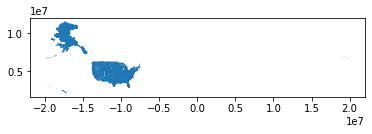

In [18]:
attbound.plot()

In [19]:
attbound.shape

(75128, 14)

In [20]:
attbound.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# School geolocation

NCES also publishes an [Education Demographics and Geographic Estimates (EDGE) page](https://nces.ed.gov/programs/edge/Geographic/SchoolLocations), which contains a dataset with the street addresses of schools as reported by the CCD as a shapefile. School year 18-19 is the most recent data year. We can merge these point data with census geographies or the school catchment boundaries.

From the [documentation:](https://nces.ed.gov/programs/edge/docs/EDGE_GEOCODE_PUBLIC_FILEDOC.pdf)

>Most LEAs are independent local governments that have authority to determine their geographic boundaries. These boundaries may or may not be consistent with boundaries for other types of legal and statistical areas. As a result, LEAs may have multiple spatial associations with other types of geographic areas. For example, an LEA boundary may include territory in two different counties or intersect three different congressional districts. 

>The LEA geocode file assigns a single geographic association for **counties**, core based statistical areas **(CBSAs)**, combined statistical areas **(CSAs)**, New England city and town areas **(NECTAs)**, and **congressional districts** to each agency based on the reported location of its administrative office. These associations are useful, but not necessarily complete. A complete set of associations is available from the EDGE School District Geographic Relationship Files (GRF). The GRFs are based on the Census Bureau’s TIGER database, and they provide a separate record for each part of a school district that is uniquely associated with another type of geographic area.

**Download the Public School Data for 18-19 and Private school data for 17-18 (most recent for both). Save the shapefile directories in `data/edge_geocode/Shapefile_SCH/` (gitignored).**

In [55]:
gdf = gpd.read_file("data/edge_geocode/Shapefile_SCH/EDGE_GEOCODE_PUBLICSCH_1819.shp")
gdf2 = gpd.read_file("data/edge_geocode/Shapefile_SCH/EDGE_GEOCODE_PRIVATESCH_1718.shp")

In [22]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [72]:
gdf = gdf.to_crs("EPSG:3857")
gdf2 = gdf2.to_crs("EPSG:3857")

<AxesSubplot:>

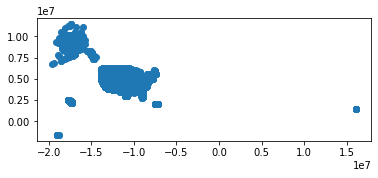

In [35]:
gdf.plot()

In [73]:
gdf.head()
# Albertville on top again 

,NCESSCH,LEAID,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,LOCALE,LAT,LON,CBSA,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
0,010000500870,0100005,Albertville Middle School,01,600 E Alabama Ave,Albertville,AL,35950,01,01095,Marshall County,32,34.260194,-86.206174,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-9596427.260 4063793.079)
1,010000500871,0100005,Albertville High School,01,402 E McCord Ave,Albertville,AL,35950,01,01095,Marshall County,32,34.262226,-86.204884,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-9596283.658 4064066.771)
2,010000500879,0100005,Evans Elementary School,01,901 W McKinney Ave,Albertville,AL,35950,01,01095,Marshall County,32,34.273318,-86.220144,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-9597982.410 4065560.885)
3,010000500889,0100005,Albertville Elementary School,01,145 West End Drive,Albertville,AL,35950,01,01095,Marshall County,32,34.252700,-86.221806,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-9598167.409 4062783.762)
4,010000501616,0100005,Big Spring Lake Kindergarten School,01,257 Country Club Rd,Albertville,AL,35951,01,01095,Marshall County,32,34.289849,-86.193289,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-9594992.922 4067788.000)


In [74]:
gdf2.shape

(22890, 24)

In [75]:
gdf2.head()

,PPIN,NAME,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,LOCALE,LAT,LON,CBSA,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
0,00002722,AUTAUGA ACADEMY,497 GOLSON RD,PRATTVILLE,AL,36067,01,01001,Autauga County,41,32.472090,-86.541877,33860,"Montgomery, AL",1,N,N,N,N,0102,01042,01030,2017-2018,POINT (-9633797.433 3825440.215)
1,A0100060,CAMELLIA BAPTIST WEM,201 WOODVALE RD,PRATTVILLE,AL,36067,01,01001,Autauga County,21,32.469051,-86.457873,33860,"Montgomery, AL",1,N,N,N,N,0102,01088,01030,2017-2018,POINT (-9624446.145 3825039.231)
2,A0500015,EAST MEMORIAL CHRISTIAN ACADEMY,1320 OLD RIDGE RD N,PRATTVILLE,AL,36066,01,01001,Autauga County,41,32.499694,-86.424681,33860,"Montgomery, AL",1,N,N,N,N,0102,01088,01030,2017-2018,POINT (-9620751.228 3829083.109)
3,A0900032,FIRST PRESBYTERIAN KINDERGARTEN,211 S CHESTNUT ST,PRATTVILLE,AL,36067,01,01001,Autauga County,21,32.460800,-86.472061,33860,"Montgomery, AL",1,N,N,N,N,0102,01088,01030,2017-2018,POINT (-9626025.546 3823950.603)
4,A1300011,FOUNTAIN CITY BAPTIST HOME SCHOOL,237 S NORTHINGTON ST,PRATTVILLE,AL,36067,01,01001,Autauga County,21,32.459900,-86.466881,33860,"Montgomery, AL",1,N,N,N,N,0102,01088,01030,2017-2018,POINT (-9625448.913 3823831.864)


In [76]:
t = pd.concat([gdf, gdf2], ignore_index=True)

In [77]:
t.shape
# 125,000 public and private schools

(125066, 27)

If we want to include private schools, we'll merge `t` instead of `gdf` into the analysis

# Example merged data

#### Enrollment

In [79]:
caenroll = df.loc[df['ST'] == 'CA']

In [80]:
caenroll.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,GRADE,RACE_ETHNICITY,SEX,STUDENT_COUNT,TOTAL_INDICATOR,DMS_FLAG
674339,2018-2019,6,CALIFORNIA,CA,Vasquez High,1,NaN,CA-1975309,600001,CA-1975309-1995786,60000103278,603278,Grade 10,American Indian or Alaska Native,Female,NaN,Category Set A - By Race/Ethnicity; Sex; Grade,Not reported
674340,2018-2019,6,CALIFORNIA,CA,Vasquez High,1,NaN,CA-1975309,600001,CA-1975309-1995786,60000103278,603278,Grade 10,American Indian or Alaska Native,Male,1.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
674341,2018-2019,6,CALIFORNIA,CA,Vasquez High,1,NaN,CA-1975309,600001,CA-1975309-1995786,60000103278,603278,Grade 10,Asian,Female,NaN,Category Set A - By Race/Ethnicity; Sex; Grade,Not reported
674342,2018-2019,6,CALIFORNIA,CA,Vasquez High,1,NaN,CA-1975309,600001,CA-1975309-1995786,60000103278,603278,Grade 10,Asian,Male,1.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
674343,2018-2019,6,CALIFORNIA,CA,Vasquez High,1,NaN,CA-1975309,600001,CA-1975309-1995786,60000103278,603278,Grade 10,Black or African American,Female,2.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported


In [81]:
caenroll.shape
# 1.1 million down from 12 million.

(1180568, 18)

#### Attendence bounds

In [37]:
attbound.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry
0,None,010000500870,Ala Avenue Middle Sch,0100005,07,08,1,AL,0,146828.793028,1.012552e+08,2,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
1,None,010000500871,Albertville High Sch,0100005,09,12,1,AL,0,146828.793028,1.012552e+08,3,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
2,None,010000500879,Evans Elem Sch,0100005,05,06,1,AL,0,146828.793028,1.012552e+08,2,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
3,None,010000500889,Albertville Elem Sch,0100005,03,04,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
4,None,010000501616,Big Spring Lake Kinderg Sch,0100005,KG,KG,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."


In [38]:
caatt = attbound.loc[attbound['stAbbrev'] == 'CA']

In [39]:
caatt.shape

(7587, 14)

<AxesSubplot:>

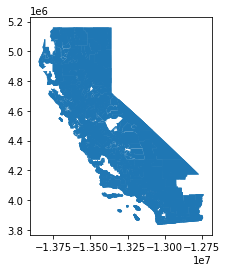

In [40]:
caatt.plot()


#### School locations

In [41]:
gdf.head()

,NCESSCH,LEAID,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,LOCALE,LAT,LON,CBSA,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
0,010000500870,0100005,Albertville Middle School,01,600 E Alabama Ave,Albertville,AL,35950,01,01095,Marshall County,32,34.260194,-86.206174,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-9596427.260 4063793.079)
1,010000500871,0100005,Albertville High School,01,402 E McCord Ave,Albertville,AL,35950,01,01095,Marshall County,32,34.262226,-86.204884,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-9596283.658 4064066.771)
2,010000500879,0100005,Evans Elementary School,01,901 W McKinney Ave,Albertville,AL,35950,01,01095,Marshall County,32,34.273318,-86.220144,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-9597982.410 4065560.885)
3,010000500889,0100005,Albertville Elementary School,01,145 West End Drive,Albertville,AL,35950,01,01095,Marshall County,32,34.252700,-86.221806,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-9598167.409 4062783.762)
4,010000501616,0100005,Big Spring Lake Kindergarten School,01,257 Country Club Rd,Albertville,AL,35951,01,01095,Marshall County,32,34.289849,-86.193289,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-9594992.922 4067788.000)


In [42]:
caloc = gdf.loc[gdf['STATE'] == 'CA']

In [43]:
caloc.shape

(10552, 26)

<AxesSubplot:>

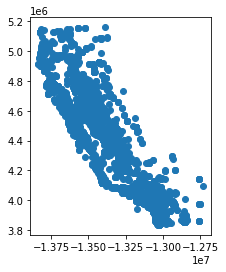

In [44]:
caloc.plot()

In [45]:
merge = pd.merge(caatt, caloc, how='left', left_on='ncessch', right_on='NCESSCH')

In [67]:
merge.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry_x,NCESSCH,LEAID,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,LOCALE,LAT,LON,CBSA,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry_y
0,Vasquez High,060000103278,Vasquez High,0600001,09,12,0,CA,0,133901.224937,8.089787e+08,3,0,"POLYGON ((-13162468.047 4103989.263, -13161303...",060000103278,0600001,Vasquez High,06,33630 Red Rover Mine Rd.,Acton,CA,93510,06,06037,Los Angeles County,41,34.493628,-118.216068,31080,"Los Angeles-Long Beach-Anaheim, CA",1,348,"Los Angeles-Long Beach, CA",N,N,0625,06036,06021,2018-2019,POINT (-13159752.604 4095278.402)
1,Meadowlark Elementary,060000107534,Meadowlark Elementary,0600001,KG,05,0,CA,0,98640.270744,4.097022e+08,1,0,"POLYGON ((-13156328.553 4104009.539, -13156326...",060000107534,0600001,Meadowlark Elementary,06,3015 W. Sacramento St.,Acton,CA,93510,06,06037,Los Angeles County,42,34.474318,-118.185622,31080,"Los Angeles-Long Beach-Anaheim, CA",1,348,"Los Angeles-Long Beach, CA",N,N,0625,06036,06021,2018-2019,POINT (-13156363.359 4092670.585)
2,High Desert,060000109444,High Desert,0600001,06,08,0,CA,0,133901.224937,8.089787e+08,2,0,"POLYGON ((-13162468.047 4103989.263, -13161303...",060000109444,0600001,High Desert,06,3620 Antelope Woods Rd.,Acton,CA,93510,06,06037,Los Angeles County,41,34.491367,-118.194745,31080,"Los Angeles-Long Beach-Anaheim, CA",1,348,"Los Angeles-Long Beach, CA",N,N,0625,06036,06021,2018-2019,POINT (-13157378.931 4094973.020)
3,Not provided,060000199991,Unassigned,0600001,KG,05,0,CA,0,12587.404553,9.853027e+06,1,0,"POLYGON ((-13171958.590 4087695.227, -13172297...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,Not provided,060000199992,Unassigned,0600001,06,08,0,CA,0,12587.404553,9.853027e+06,2,0,"POLYGON ((-13171958.590 4087695.227, -13172297...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [90]:
merge.loc[merge['schnam'] == 'Unassigned'].shape
# see previous note on 'Unassigned'

(352, 40)

# Plot

`merge` contains the catchment zones and locations of the schools as `geometry1` and `geometry2`, respectively.

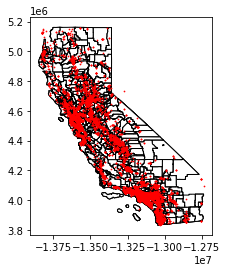

In [52]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
caatt.plot(ax=ax, color='white', edgecolor='black')
caloc.plot(ax=ax, marker='o', color='red', markersize=.5)
plt.show();

From here we can merge with our enrollment data.